In [1]:
import tensorflow as tf
print("We are using tensorflow version: ",tf.__version__)

We are using tensorflow version:  1.13.1


In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [3]:
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


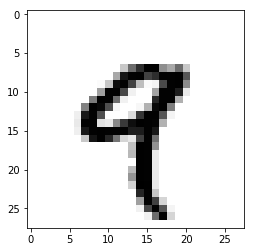

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[4], cmap='binary')
plt.show()

In [5]:
y_train[4]

9

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
#5 	[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#7 	[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
#1 	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

from tensorflow.keras.utils import to_categorical
y_train_encoded= to_categorical(y_train)
y_test_encoded= to_categorical(y_test)

In [8]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


In [9]:
y_train_encoded[4] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
import numpy as np
x_train_reshape= np.reshape(x_train, (60000,784)) #28*28=784
x_test_reshape= np.reshape(x_test, (10000, 784))
print('x_train_reshaped: ',x_train_reshape.shape)
print('x_test_reshaped: ', x_test_reshape.shape)

x_train_reshaped:  (60000, 784)
x_test_reshaped:  (10000, 784)


In [11]:
print(set(x_train_reshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [12]:
x_mean=np.mean(x_train_reshape)
x_std= np.std(x_train_reshape)
const= 1e-10
x_train_norm=(x_train_reshape- x_mean)/(x_std+ const)
x_test_norm= (x_test_reshape- x_mean)/(x_std+ const)


In [13]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model= Sequential([Dense(128, activation='relu', input_shape=(784,)),
                  Dense(128, activation='relu'),
                  Dense(10, activation='softmax')])


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy'
              ,metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 11s 187us/sample - loss: 0.3718 - acc: 0.8929
Epoch 2/3
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1874 - acc: 0.9462
Epoch 3/3
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1424 - acc: 0.9588


In [17]:
loss, accuracy= model.evaluate(x_test_norm, y_test_encoded)
print('Test accuracy: ', accuracy*100)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.1292 - acc: 0.9623
Test accuracy:  96.23000025749207


In [18]:
##PREDICTIONS:

In [19]:
predictions=model.predict(x_test_norm)
print('Shape of predictions',predictions.shape )


Shape of predictions (10000, 10)


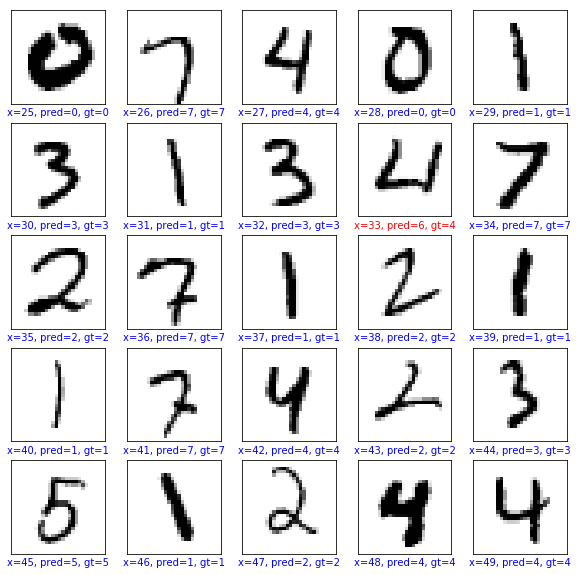

In [29]:
plt.figure(figsize=(10,10))
start_index=0

for x in range(25):
    plt.subplot(5,5,x+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(predictions[start_index+x])
    gt= y_test[start_index+x]
    col='b'
    
    if pred!= gt:
        col='r'
    plt.xlabel('x={}, pred={}, gt={}'.format(start_index+x, pred, gt), color=col)
    plt.imshow(x_test[start_index+x], cmap='binary')
plt.show()

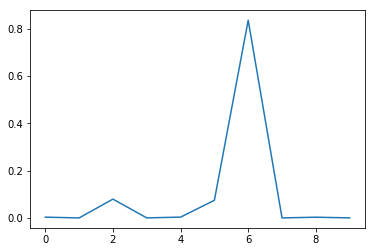

In [26]:
plt.plot(predictions[8])
plt.show()